In [1]:
import argparse
import os
import re
import time
import json
import csv
import signal
import sys
import threading
import queue
from collections import deque
from datetime import datetime
from pathlib import Path
import sqlite3


In [2]:
import serial
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import curses

In [1]:
import codecs
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

In [2]:
CANMessage = namedtuple('CANMessage', 'timestamp id data')

def decode(msg: str) -> CANMessage:
    s = msg.split('-')
    return CANMessage(timestamp=int(s[0]), id=s[1], data=s[-1][:-1])

    # return CANMessage(id=msg[0:3], data=msg[3:-1])

In [3]:
msgs = []
hex_msgs = []
with open("logs/can-dump-2.log", "r") as f:
    for line in f:
        # print(line)
        # break
        if len(line) == 1:
            continue
        msgs.append(decode(line))
        # hex_msg = [hex(int(m)) for m in line.split('-')]
        # msg = [int(m) for m in line.split('-')]
        # msgs.append(msg)
        # hex_msgs.append(hex_msg)
        

In [4]:
print(len(msgs[2]))
print(msgs[3])

# print(len(hex_msgs[2]))
# print(hex_msgs[2])

# print([codecs.decode(m, 'hex') for m in hex_msgs[2]])

3
CANMessage(timestamp=4200, id='215', data='FFF0FF00FFFF')


In [5]:
ids = set([m.id for m in msgs])
print(ids)

{'180', '421', '560', '215', '1F9', '54C', '515', '174', '354', '216', '358', '285', '551', '682', '284', '176', '625', '355', '280', '2', '351', '5C5', '292', '160', '2DE', '177', '342', '60D', '182', '245', '580', '35D', '6E2'}


In [6]:
def rpm(data):
    A = int(data[0:2], 16)
    B = int(data[2:4], 16)
    return (A*256 + B)/10
    # return (A + B*256)/10

def steering_angle(data):
    A = int(data[0:2], 16)
    B = int(data[2:4], 16)
    return B*A/10

def pedal_pos(data):
    A = int(data[6], 16)
    B = int(data[2:4], 16)
    B = int(data[2:4], 16)
    return B*A/10

ECM_180 = [m for m in msgs if m.id == '180']
print(ECM_180[0])

# ECM_180 = [m for m in msgs if m.id == '180']
# print(ECM_180[0])

CANMessage(timestamp=20697, id='180', data='00005DB3D5003910')


In [7]:
RPMs = []
T = []
for m in ECM_180:
    RPMs.append(rpm(m.data))
    T.append(m.timestamp)
# print(RPMs)
# print(max(RPMs))
# print(max(RPMs))

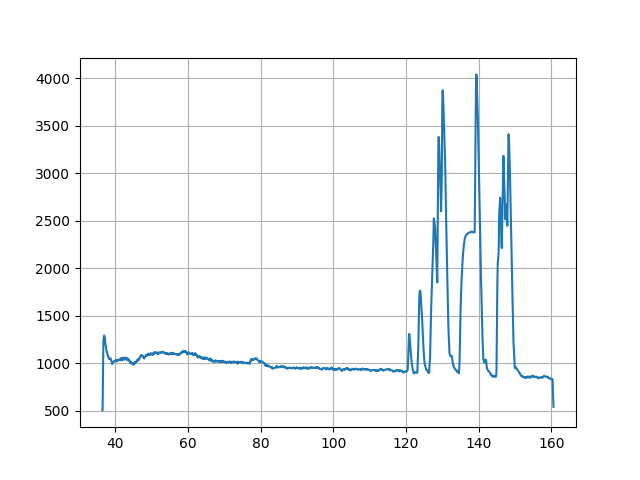

In [8]:
RPMs = np.array(RPMs)
T = np.array(T)

T_true = T[RPMs > 500]
RPM_true = RPMs[RPMs > 500]


T_true = T_true/1000

plt.close('rpm')
rpm_fig = plt.figure('rpm')
plt.plot(T_true, RPM_true)
plt.grid()
plt.show()

In [9]:
T

array([ 20697,  20779,  21188, ..., 165819, 165880, 165971])

In [13]:
[m.id for m in msgs]
len('\n')

1

In [11]:
# b_string = b'\x00\x0c\x00\x7f\xff\xf0\xff\x00\xff\xff\x00\x00\x80\x03' #p\x00\x0e$\x00\x00\xff\xff\x00\x00@\x02\x00\x00\x00\x00\x00\x80\x03p\x00\x0e$@$\x01\xff\xc0\x00\x00\x00\x00\x00\xff\xf0\xff\x00\xff\xff\x00\x00\x80\x03p\x00\x0e$\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x80\x03p\x00\x0e$@$\x01\xff\xc0\x00\x00\x00\x00\x00\xff\xf0\xff\x00\xff\xff\x00\x00\x80\x03p\x00\x0e$\x00\x00\xff\xff\x00\x00@\x00\x03\x00\x00\x00\x00\x00\x00\x00\x00\x80\x03p\x00\x0e$@$\x01\xff\xc0\x00\x00\x00\x00\x00\xff\xf0\xff\x00\xff\xff\x00\x00\x80\x03p\x00\x0e$\x02\x00\xff\x0e \x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x80\x03p\x00\x0e$@$\x01\xff\xc0\x00\x00\x00\x00\x00\xff\xf0\xff\x00\xff\xff\x00\x00\x80\x03p\x00\x0e$\x00\x00\xff\xff\x00\x00@\x00\x00\x00\x00\x00@\x00\x00\x00\x00\x80\x03p\x00\x0e$@$\x01\xff\xc0\x00\x00\x00\x00\x00@\x01\xae\n'

In [12]:
import codecs

codecs.decode(b_string, "utf-8")
# b_string.decode()

NameError: name 'b_string' is not defined